In [184]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [185]:
df = pd.read_csv('canada_per_capita_income.csv')
df.head(10)

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


In [186]:
df.isnull().sum()

year                       0
per capita income (US$)    0
dtype: int64

In [187]:
df.describe()

,year,per capita income (US$)
count,47.000000,47.000000
mean,1993.000000,18920.137063
std,13.711309,12034.679438
min,1970.000000,3399.299037
25%,1981.500000,9526.914515
50%,1993.000000,16426.725480
75%,2004.500000,27458.601420
max,2016.000000,42676.468370


Text(0.5, 1.0, 'Per Capita income (US$)')

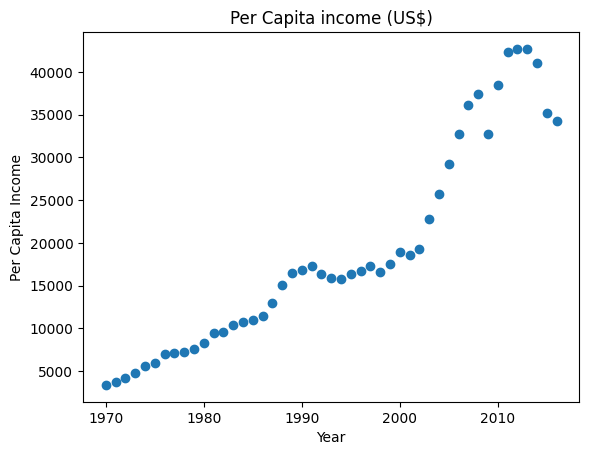

In [188]:
plt.scatter(df.year, df['per capita income (US$)'])
plt.xlabel('Year')
plt.ylabel('Per Capita Income')
plt.title("Per Capita income (US$)")

In [189]:
X = df[['year']]
y = df[['per capita income (US$)']]

X.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [190]:
y.head()

,per capita income (US$)
0,3399.299037
1,3768.297935
2,4251.175484
3,4804.463248
4,5576.514583


In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [192]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [193]:
m = linear_reg.coef_
m

array([[812.33048044]])

In [194]:
c = linear_reg.intercept_
c

array([-1600151.91256906])

In [195]:
y = m * 2001 + c
y

array([[25321.37879392]])

In [196]:
linear_reg.predict([[2001]])

array([[25321.37879392]])

In [197]:
y_predict = linear_reg.predict(X_test)
y_predict

array([[18822.73495039],
       [ 9887.09966554],
       [34257.01407878],
       [13136.42158731],
       [28570.70071569],
       [35069.34455922],
       [36694.0055201 ],
       [10699.43014598],
       [11511.76062642],
       [  139.13390024],
       [ 1763.79486113],
       [ 7450.10822422],
       [13948.75206775],
       [24509.04831348],
       [20447.39591128]])

In [198]:
pd.DataFrame(np.c_[X_test, y_test, y_predict], columns=["Year", "Per Capita Income (Provided)", "Per Capita Income (Predicted)"])

,Year,Per Capita Income (Provided),Per Capita Income (Predicted)
0,1993.0,15875.586730,18822.734950
1,1982.0,9619.438377,9887.099666
2,2012.0,42665.255970,34257.014079
3,1986.0,11482.891530,13136.421587
4,2005.0,29198.055690,28570.700716
5,2013.0,42676.468370,35069.344559
6,2015.0,35175.188980,36694.005520
7,1983.0,10416.536590,10699.430146
8,1984.0,10790.328720,11511.760626
9,1970.0,3399.299037,139.133900


In [199]:
linear_reg.score(X_test, y_test)

0.9133466873560346